In [1]:
import pandas as pd

# 读取数据
file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

# 查看数据的前几行
print(df.head())


   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

In [2]:
# 显示数据类型
print(df.dtypes)


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [3]:
# 删除 "id" 和 "Unnamed: 0" 列，inplace=True 表示直接修改原数据
df.drop(columns=["id", "Unnamed: 0"], axis=1, inplace=True)

# 显示数据的统计摘要
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [4]:
# 统计不同楼层的房屋数量
floor_counts = df['floors'].value_counts().to_frame()

# 显示结果
print(floor_counts)


        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


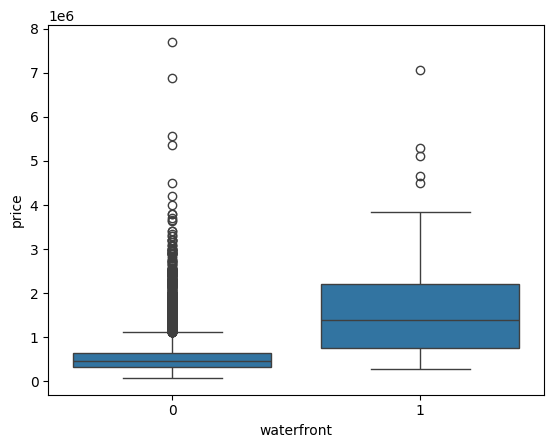

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 seaborn 生成箱形图
sns.boxplot(x='waterfront', y='price', data=df)

# 显示图表
plt.show()


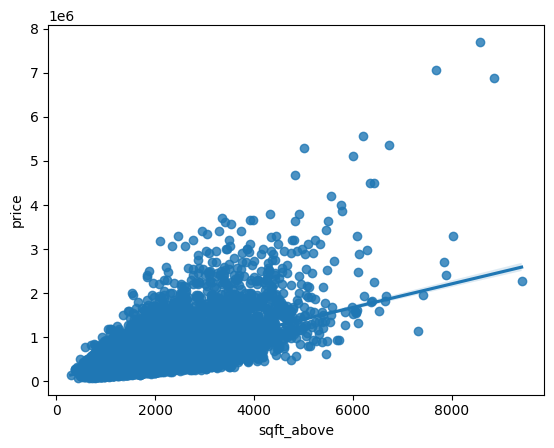

In [6]:
# 使用 seaborn 生成 sqft_above 和 price 的回归图
sns.regplot(x='sqft_above', y='price', data=df)

# 显示图表
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 特征和目标变量
X = df[['sqft_living']]
y = df['price']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练线性回归模型
lm = LinearRegression()
lm.fit(X_train, y_train)

# 计算 R^2 值
R2 = lm.score(X_test, y_test)
print(f"R^2 值: {R2}")


R^2 值: 0.47915772372653753


In [9]:
# 删除含有 NaN 的行
df_clean = df.dropna()

# 继续使用清理后的数据
X_clean = df_clean[['sqft_living']]
y_clean = df_clean['price']

# 线性回归建模
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=0)

# 训练线性回归模型
lm = LinearRegression()
lm.fit(X_train, y_train)

# 计算 R^2 值
R2 = lm.score(X_test, y_test)
print(f"R^2 值: {R2}")



R^2 值: 0.4692888075830891


In [10]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# 创建 pipeline，包含数据缩放、多项式转换和线性回归
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# 拟合模型
pipeline.fit(X_train, y_train)

# 计算 R^2 值
R2 = pipeline.score(X_test, y_test)
print(f"R^2 值: {R2}")


R^2 值: 0.5004718172677318


In [11]:
from sklearn.linear_model import Ridge

# 创建 Ridge 回归模型，正则化参数 alpha=0.1
ridge_model = Ridge(alpha=0.1)

# 拟合模型
ridge_model.fit(X_train, y_train)

# 计算 R^2 值
R2 = ridge_model.score(X_test, y_test)
print(f"R^2 值: {R2}")


R^2 值: 0.46928880758368563
